## **PART 1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
df=pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
#1.Crosstab Analysis:
#Create a crosstab between the product category and the isBestSeller status.
#Are there categories where being a best-seller is more prevalent?
#Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.
crosstab_result = pd.crosstab(df["category"], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [8]:
#2. Statistical Tests:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.


from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [14]:
from scipy.stats.contingency import association
#Compute Cramér's V to understand the strength of association between best-seller status and category.
association(crosstab_result, method="cramer")

0.1222829439760564

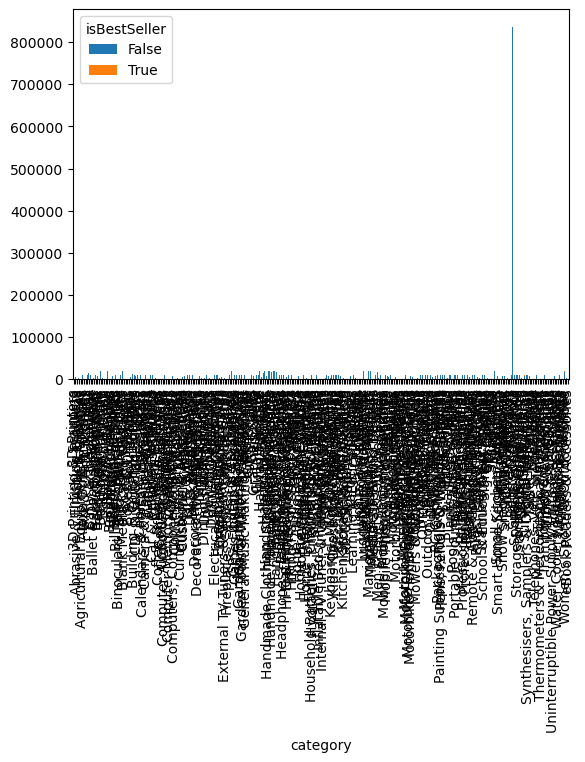

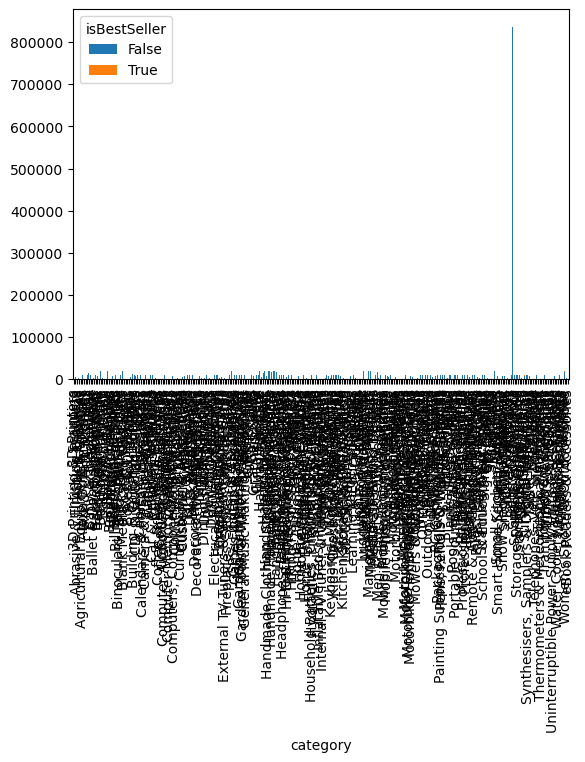

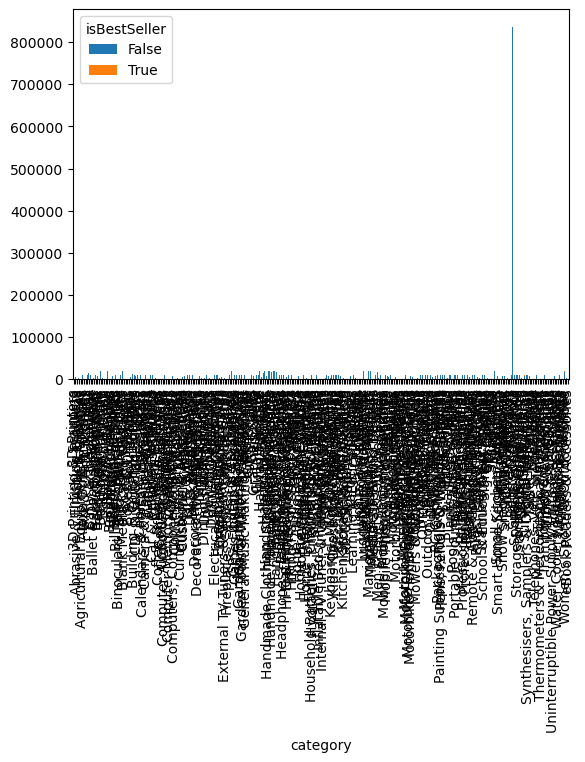

In [21]:
#3. Visualization
crosstab_result.plot(kind="bar", stacked=True);
plt.show()

## **Part 2**

In [34]:
#Remove Outliner
#Calculate the Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

print(Q1,Q3)

#Calculate IQR
IQR = Q3 - Q1
print(IQR)

#Calculate the limits to remove outliners
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

#Dataframe with not outliner
df_no_outliner = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_no_outliner

9.99 45.99
36.0


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [69]:
top_20=pd.DataFrame(df["category"].value_counts().head(20)).reset_index()
top_20_cat=top_20["category"].tolist()
top_20_cat

['Sports & Outdoors',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Bath & Body',
 'Birthday Gifts',
 'Manicure & Pedicure Products',
 'Skin Care',
 'Make-up',
 'Hair Care',
 'Fragrances',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Luggage and travel gear',
 'Handmade Jewellery',
 'Handmade Artwork',
 'Women',
 'Handmade Home & Kitchen Products',
 'Handmade Kitchen & Dining',
 'Men',
 'Baby']

In [83]:
df_violin = df_no_outliner[df_no_outliner['category'].isin(top_20_cat)]
df_violin

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


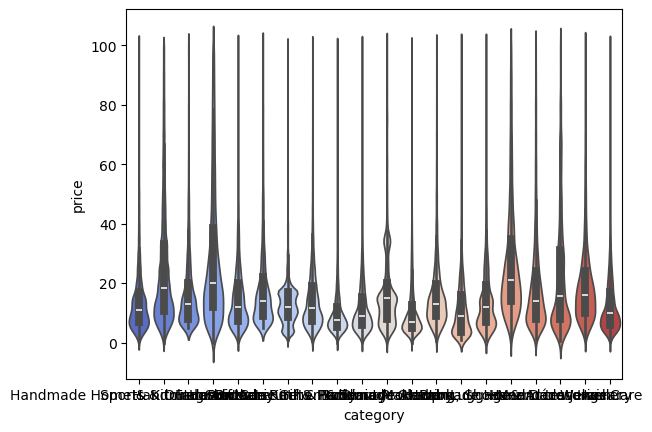

In [87]:
sns.violinplot(data=df_violin, x='category', y='price', palette="coolwarm", hue='category', legend=False);
plt.show()

In [91]:
#Create de top_10_categories
top_10=pd.DataFrame(df["category"].value_counts().head(10)).reset_index()
top_10_cat=top_10["category"].tolist()
top_10_cat

['Sports & Outdoors',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Bath & Body',
 'Birthday Gifts',
 'Manicure & Pedicure Products',
 'Skin Care',
 'Make-up',
 'Hair Care',
 'Fragrances']

In [93]:
df_bar = df_no_outliner[df_no_outliner['category'].isin(top_10_cat)]
df_bar

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


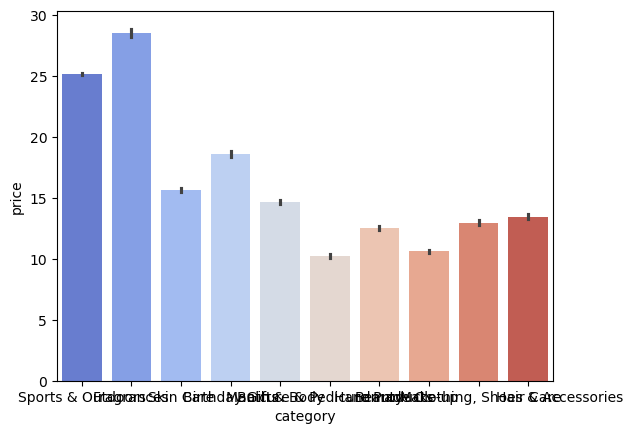

In [96]:
sns.barplot(data=df_bar, x='category', y='price', palette="coolwarm", hue='category', legend=False);
plt.show()

In [105]:
correlation_pearson = df['price'].corr(df['stars'])
correlation_spearman = df['price'].corr(df['stars'],method='spearman')
correlation_pearson, correlation_spearman


(-0.12490673262159059, -0.13316425462401277)

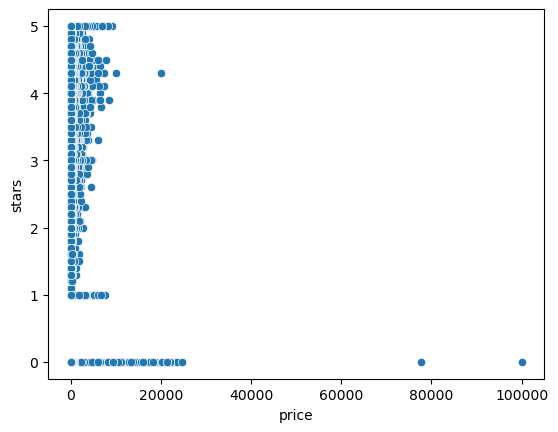

In [110]:
sns.scatterplot(data=df, x='price', y='stars');
plt.show()

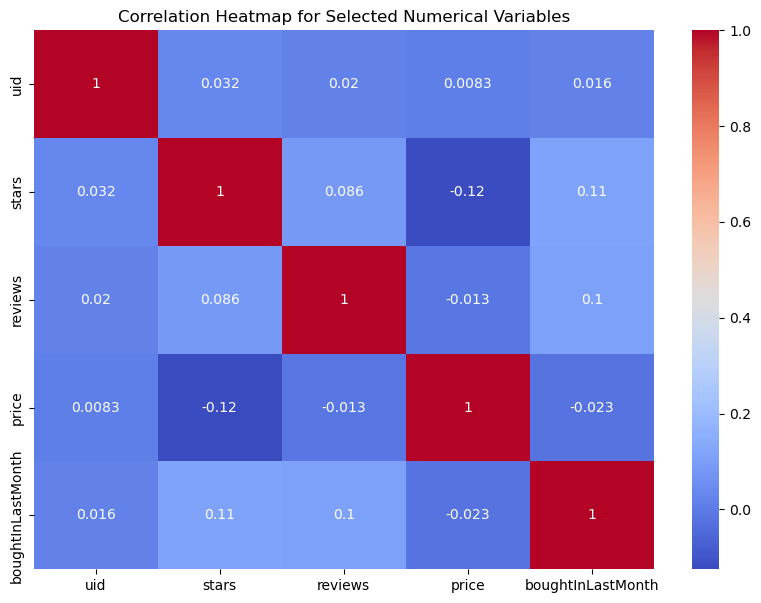

In [118]:
df_numerical=df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numerical.corr()


# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 7))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

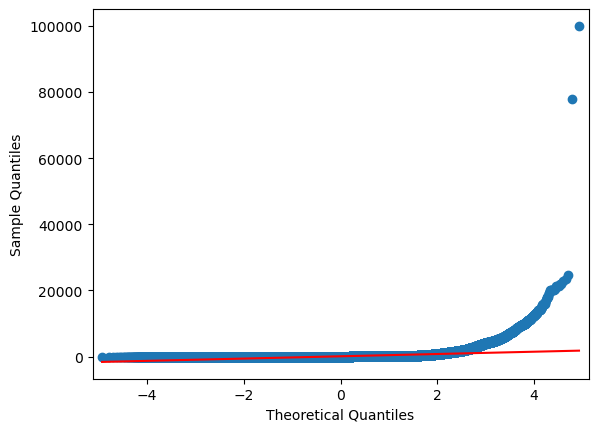

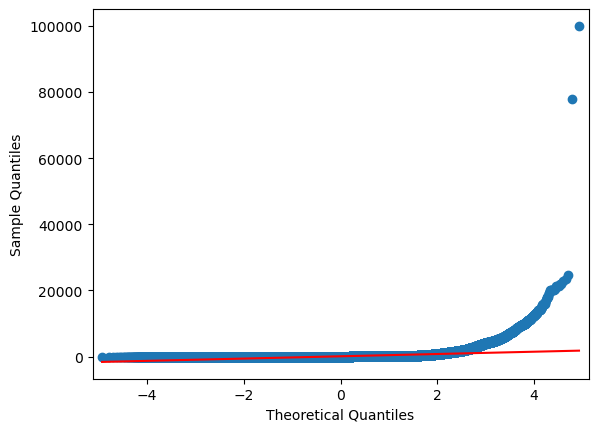

In [123]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');
plt.show()